# 1. Perkenalan

Nama: Bintang Muhammad <br>
Course: Data Science <br>
Batch: 6 <br>

## About The Data

- The Data contains Health conditions of patients.
- Target variable: Death Event.
- Objective: create Random Forest and Boosting model to predict Target Variable.

# 2. Import Library

In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,plot_confusion_matrix, classification_report

# 3. Data Loading

In [28]:
#data loading
df=pd.read_csv('training_data.csv.xls')

In [29]:
tr=pd.read_csv('unlabelled.csv.xls')

In [30]:
#view data
df.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
447,1349,0,2.0,1,15,0,62,0.3,114,5,...,592,772,2756,11,3,4,1,0,0,1
700,561,1,2.1,1,7,1,2,0.1,193,3,...,1055,1294,665,10,0,4,1,1,0,0
60,1484,0,3.0,0,3,0,12,0.6,134,3,...,916,969,1457,14,4,20,1,1,0,0
1779,1807,1,2.9,0,0,0,16,0.2,125,3,...,1221,1415,2921,8,5,17,0,1,0,1
756,545,0,0.5,0,0,1,11,0.3,131,3,...,381,1452,616,15,6,19,1,1,1,0


In [31]:
tr.sample(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
985,986,971,1,2.1,0,9,0,7,0.3,143,...,17,1074,1885,811,18,2,13,1,1,0
908,909,1657,0,2.6,1,3,1,22,0.5,87,...,20,1019,1535,1852,15,5,12,1,1,0
186,187,762,1,0.6,1,11,1,39,0.7,164,...,14,1065,1686,2271,12,7,8,1,1,0
621,622,1273,0,0.5,1,6,1,47,0.2,98,...,12,685,1352,303,11,2,14,1,0,0
306,307,996,0,0.5,1,14,0,61,0.8,174,...,15,400,989,1235,11,10,16,1,1,1


# 4. Data Cleaning Training Set

In [32]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [33]:
#check null values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_class      0
dtype: int64

- No Null values on the data

In [34]:
#view duplicate data
df.duplicated().sum()

0

- No duplicate values on the data

In [52]:
df=df.astype({'blue':object,'dual_sim':object,'four_g':object,'three_g':object,'wifi':object,'touch_screen':object,'price_class':object})

# 5. Data Cleaning Training Set

In [55]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [56]:
tr.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [57]:
tr.duplicated().sum()

0

In [65]:
tr=tr.astype({'blue':object,'dual_sim':object,'four_g':object,'three_g':object,'wifi':object,'touch_screen':object})

# 5. Data Exploration

| Variable | Definition |
| ----------- | ----------- | 
| battery_power | Total energy a battery can store in one time measured in mAh
| blue | Has bluetooth or not
| clock_speed | speed at which microprocessor executes instructions
| dual_sim | Has dual sim support or not
| fc | Front Camera mega pixels
| four_g | Has 4G or not
| int_memory | Internal Memory in Gigabytes
| m_dep |Mobile Depth in cm
| mobile_wt| Weight of mobile phone
| n_cores| Number of cores of processor
| pc| Primary Camera mega pixels
| px_height| Pixel Resolution Height
| px_width| Pixel Resolution Width
| ram| Random Access Memory in Mega Bytes
| sc_h| Screen Height of mobile in cm
| sc_w| Screen Width of mobile in cm
| talk_time| longest time that a single battery charge will last when you are
| three_g| Has 3G or not
| touch_screen| Has touch screen or not
| wifi| Has wifi or not
| price_class| This is the target variable with value of 0 (low end), 1(high end). 

## Univariate Analysis

In [58]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

- Data consists of 2000 rows and 21 columns
- There is 2 float, and 12 integer data type, and 7 object data type after changing the type

In [66]:
#view statistics
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


- Allmost all features except FC does not have mean that higher than the median, this means there is low variability in the data.
- The distances from Q3 to max value or Q1 to min value is also not that far(still not far around 1 std), this means most likely there is little to no outliers in the data. 

In [67]:
#create numerical data names
nums=df.select_dtypes(include=['int64','float64']).columns

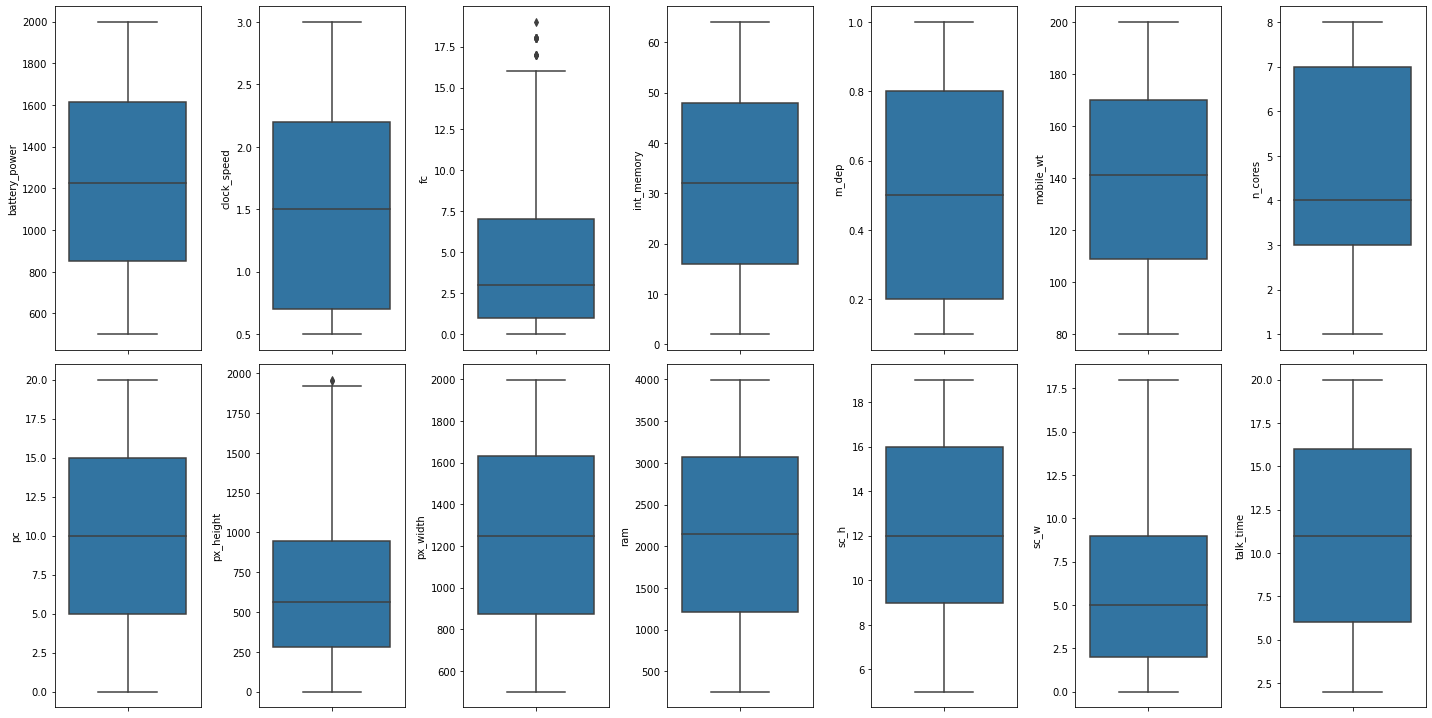

In [68]:
#visualize data with box plot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(3,7, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

- Almost all features does not have outliers except fc.

In [69]:
#took numericaldata type
nums2=df.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column battery_power outliers = 0.00%
Column clock_speed outliers = 0.00%
Column fc outliers = 2.10%
Column int_memory outliers = 0.00%
Column m_dep outliers = 0.00%
Column mobile_wt outliers = 0.00%
Column n_cores outliers = 0.00%
Column pc outliers = 0.00%
Column px_height outliers = 0.10%
Column px_width outliers = 0.00%
Column ram outliers = 0.00%
Column sc_h outliers = 0.00%
Column sc_w outliers = 0.00%
Column talk_time outliers = 0.00%


- The Data Does not have an outliers except fc, and is also small (2.1%)

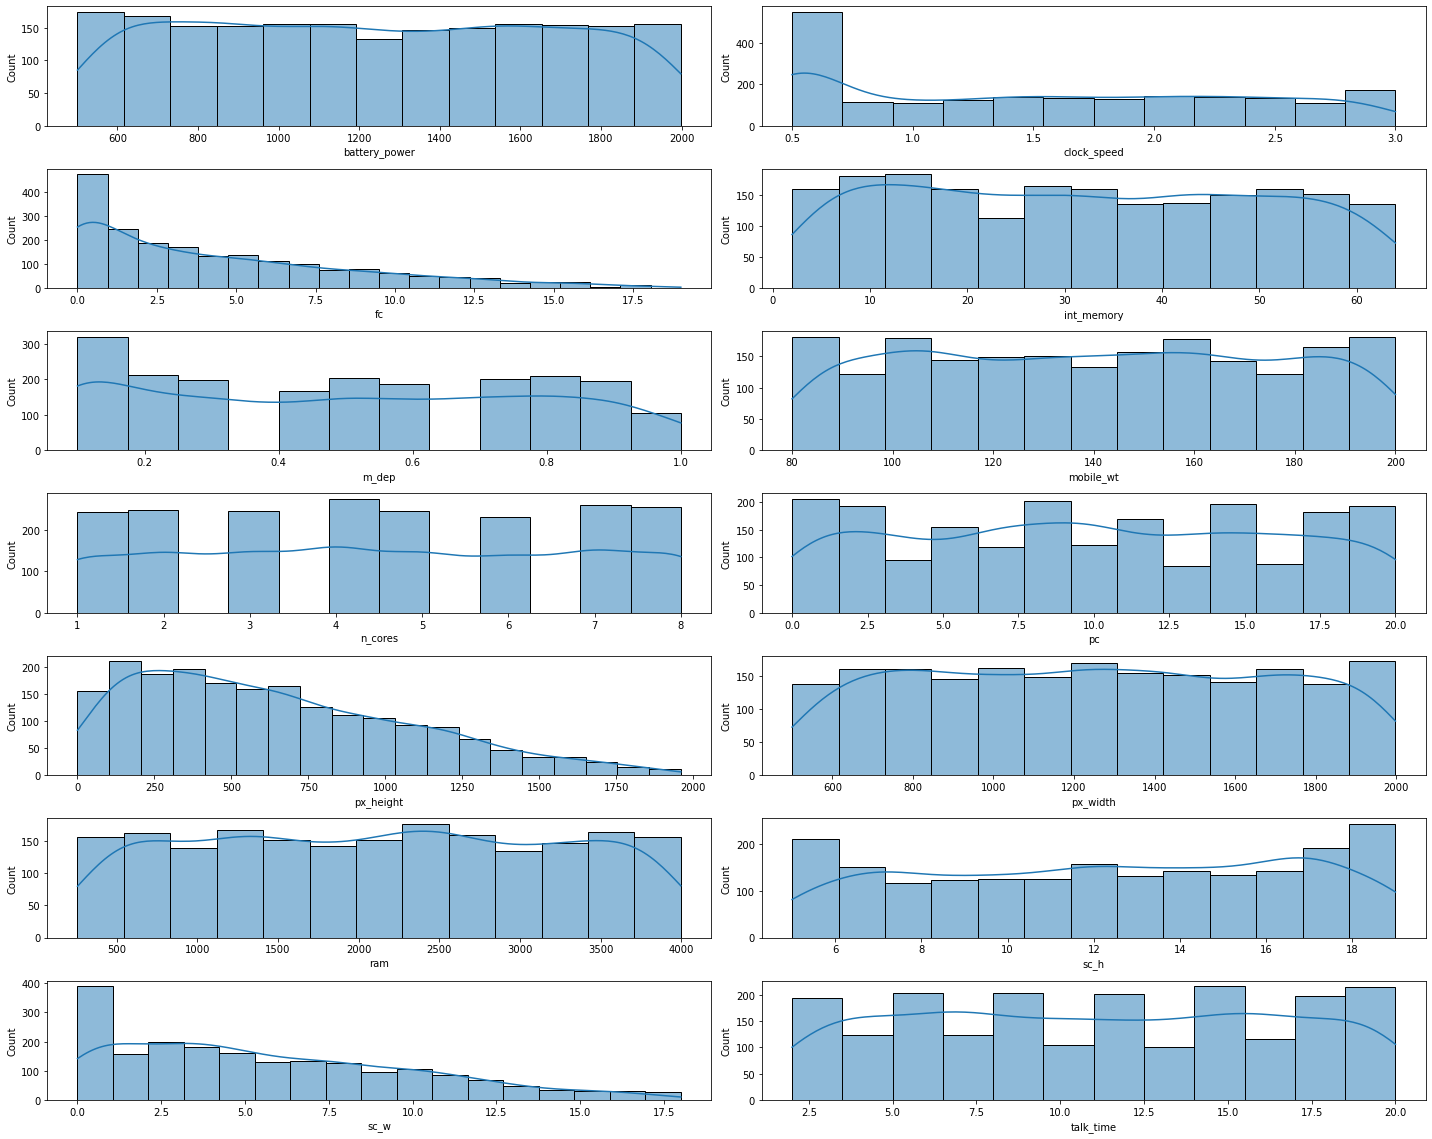

In [75]:
#visualize data with box plot
plt.figure(figsize=(20, 20))
for i in range(0, len(nums)):
    plt.subplot(9,2, i+1)
    sns.histplot(df[nums[i]],kde=True)
    plt.tight_layout()

- Almost all of the data have Uniform distribution
- sc_w, px_height, fc, have a relatively negative distribution

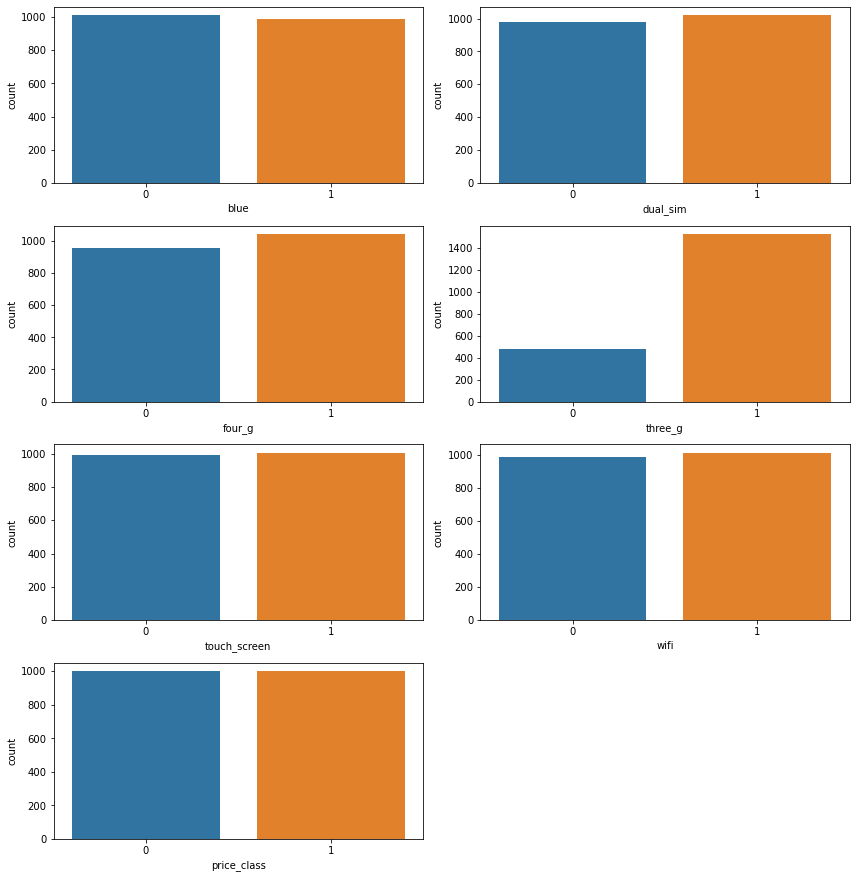

In [86]:
cats=df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 24))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(x=df[cats[i]], orient='v')
    plt.tight_layout()

- on this categorical data,almost all data have a balanced category count , except for 3G
- the number of phones that does not have 3G features is much lower than thoose who have
- The price_class target variable is balanced

## Bivariate Analysis

<AxesSubplot:>

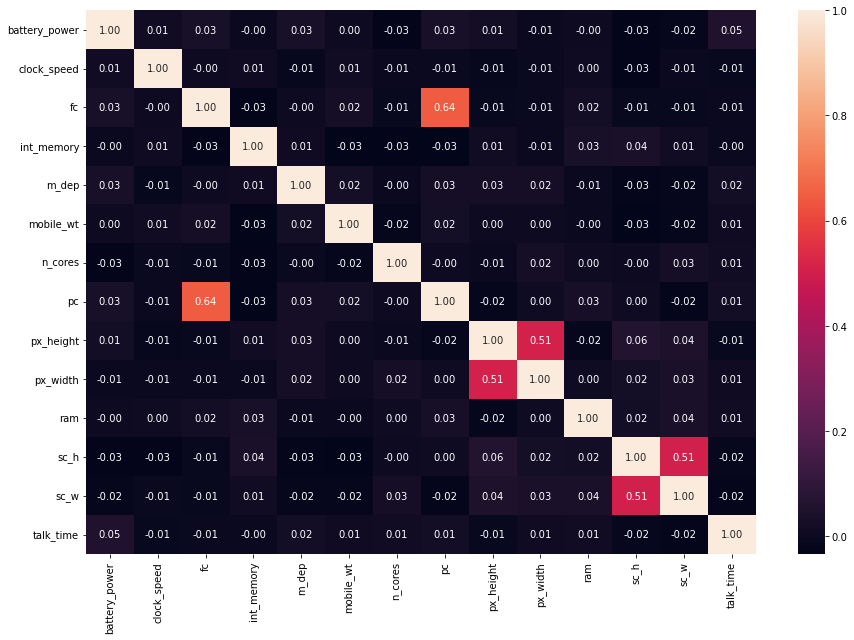

In [87]:
#view heatmap correlation to check redundant datas
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

- There are no numerical features that are redundant on the heatmap (all below 0.7)

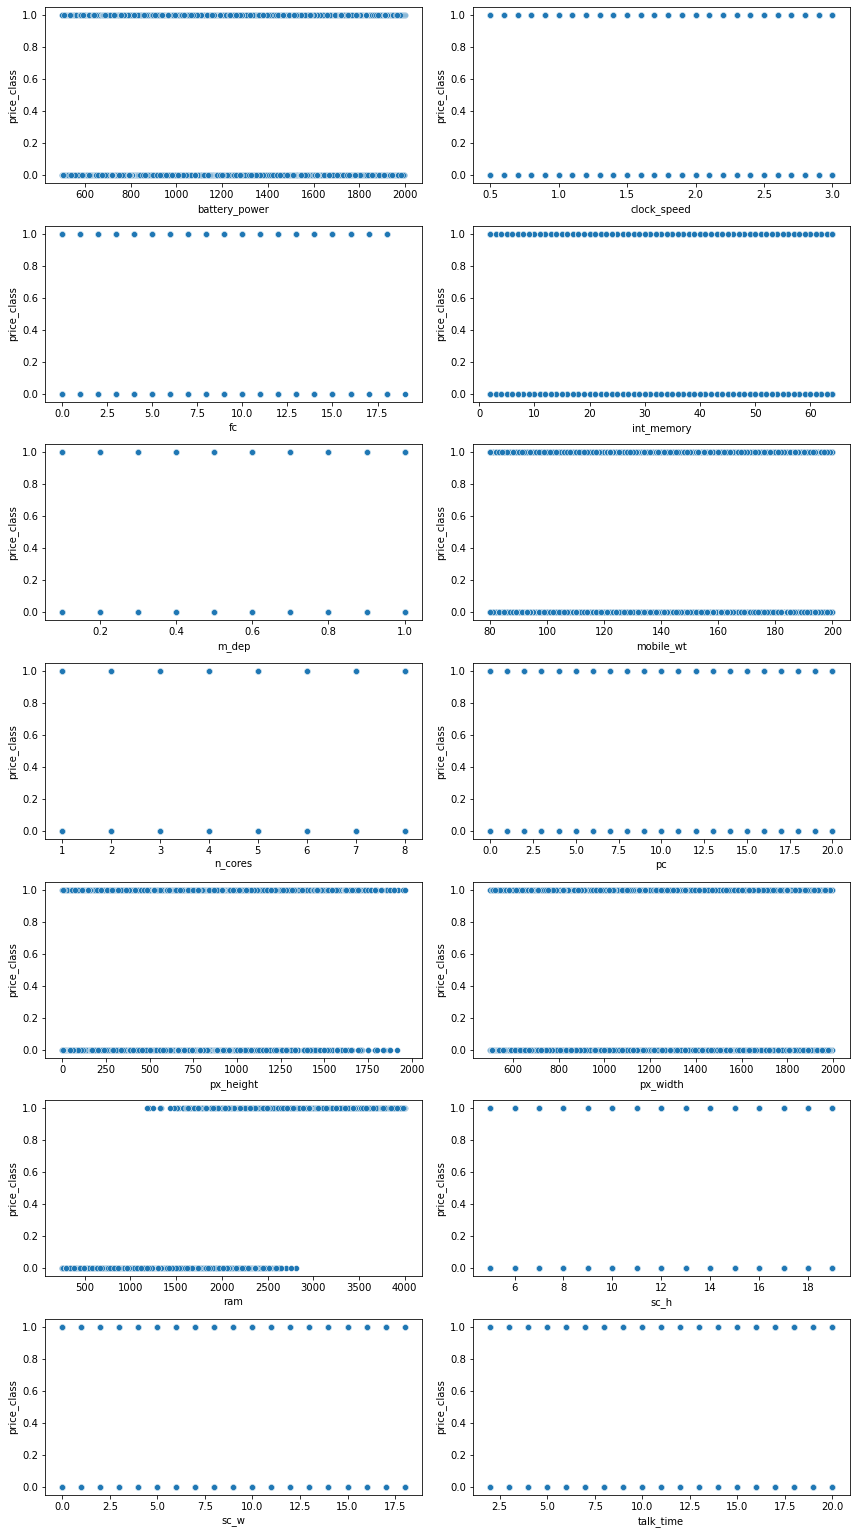

In [103]:
plt.figure(figsize=(12, 24))
sns.scatterplot(x=df[df_yes[i]],y=df['price_class'])
plt.tight_layout()

- Regardless of the price class, all features of the phone have almost balancedly distributed, for example phone with price class 0 and 1 can both have px width between 600 - 2000
- However, the ram for 2 price class is different, 0 price class is around 500 to almost 3000, and high price class is around 1200 - 4000 ram

In [123]:
dfr=df.groupby(['price_class','blue']).count()[['four_g']]
dfr=dfr.sort_values('blue',ascending=False).rename(columns={'four_g':'count'}).reset_index()
dfr

,price_class,blue,count
0,0,1,488
1,1,1,502
2,0,0,512
3,1,0,498


- The numbers of phone who have blutooth or not is almost the same

In [122]:
dfr=df.groupby(['price_class','dual_sim']).count()[['four_g']]
dfr=dfr.sort_values('dual_sim',ascending=False).rename(columns={'four_g':'count'}).reset_index()
dfr

,price_class,dual_sim,count
0,0,1,505
1,1,1,514
2,0,0,495
3,1,0,486


- The numbers of phone who have dual sim or not is almost the same

In [121]:
dfr=df.groupby(['price_class','four_g']).count()[['three_g']]
dfr=dfr.sort_values('four_g',ascending=False).rename(columns={'three_g':'count'}).reset_index()
dfr

,price_class,four_g,count
0,0,1,521
1,1,1,522
2,0,0,479
3,1,0,478


- The numbers of phone who have 4G is higher than thoose who does not have 4G

In [120]:
dfs=df.groupby(['price_class','three_g']).count()[['four_g']]
dfs=dfs.sort_values('three_g',ascending=False).rename(columns={'four_g':'count'}).reset_index()
dfs.head()

,price_class,three_g,count
0,0,1,751
1,1,1,772
2,0,0,249
3,1,0,228


- The numbers of phone who have 3G is much higher than thoose who does not have 3G

In [119]:
dfs=df.groupby(['price_class','touch_screen']).count()[['four_g']]
dfs=dfs.sort_values('touch_screen',ascending=False).rename(columns={'four_g':'count'}).reset_index()
dfs.head()

,price_class,touch_screen,count
0,0,1,523
1,1,1,483
2,0,0,477
3,1,0,517


- The numbers of phone who have touchscreen or not is almost the same, except for class - with no touchscreen

In [118]:
dfs=df.groupby(['price_class','wifi']).count()[['four_g']]
dfs=dfs.sort_values('wifi',ascending=False).rename(columns={'four_g':'count'}).reset_index()
dfs.head()

,price_class,wifi,count
0,0,1,500
1,1,1,514
2,0,0,500
3,1,0,486


- The numbers of phone who have wifi or not is almost the same for each category

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

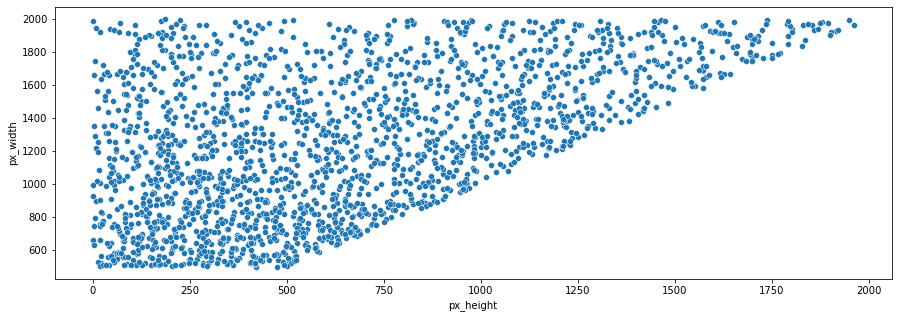

In [128]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['px_height'],y=df['px_width'])

- We can see here that there some kind of line for the phones that pevents the pixel patterns, for height, this line started from 500, and ended at around 2000
- For width, it started from around 600, and ended at 200.
- height and width have almost 0 values, this does probably is an old phone

<AxesSubplot:xlabel='m_dep', ylabel='mobile_wt'>

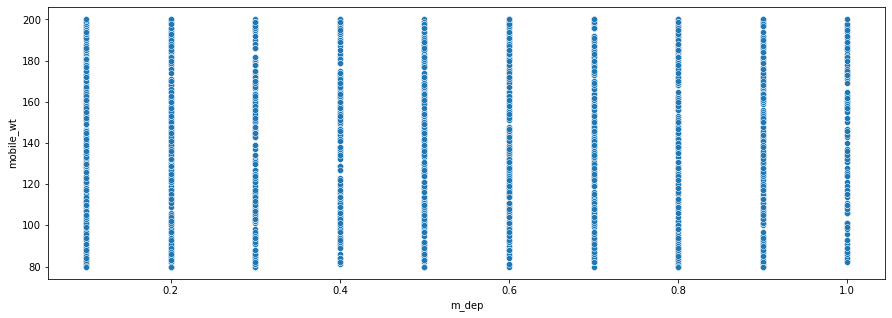

In [130]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['m_dep'],y=df['mobile_wt'])

- there is no patterns of the phone depth to phone weight, all class in the chart almost have equally distributed weight

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

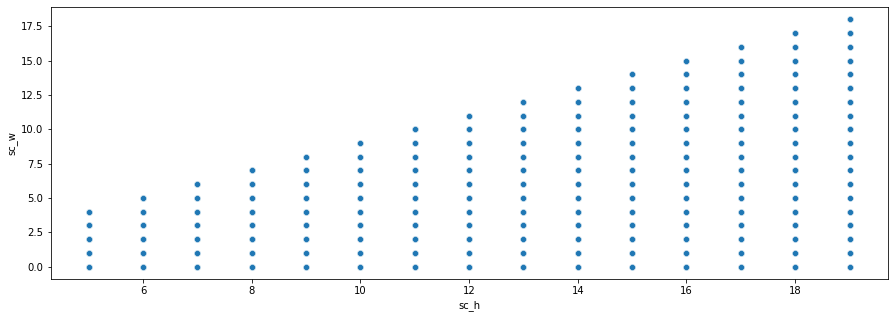

In [131]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['sc_h'],y=df['sc_w'])

<AxesSubplot:xlabel='n_cores', ylabel='clock_speed'>

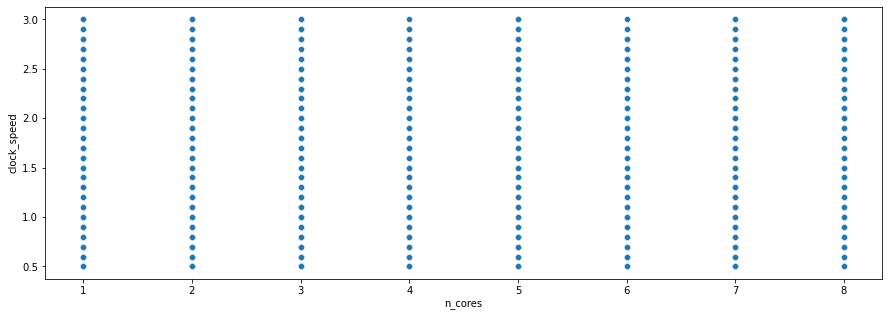

In [137]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['n_cores'],y=df['clock_speed'])

- there is no patterns of the number of cores to clock speed, all class in the chart almost have equally distributed clock speed

<AxesSubplot:xlabel='ram', ylabel='clock_speed'>

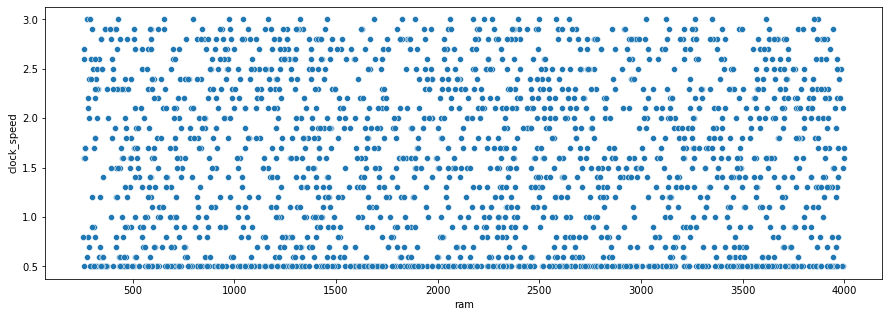

In [135]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['ram'],y=df['clock_speed'])

- there is no patterns at all between clock speed and ram.
- except all ram ranging drom 0 - 4000 can have a 0.5 clock speed

<AxesSubplot:xlabel='battery_power', ylabel='talk_time'>

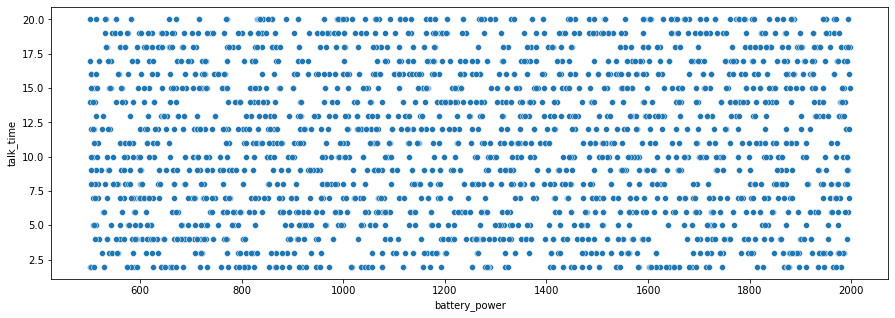

In [133]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['battery_power'],y=df['talk_time'])

- there is no patterns at all between battery power and talk time.

## Multivariate Analysis

<Figure size 864x576 with 0 Axes>

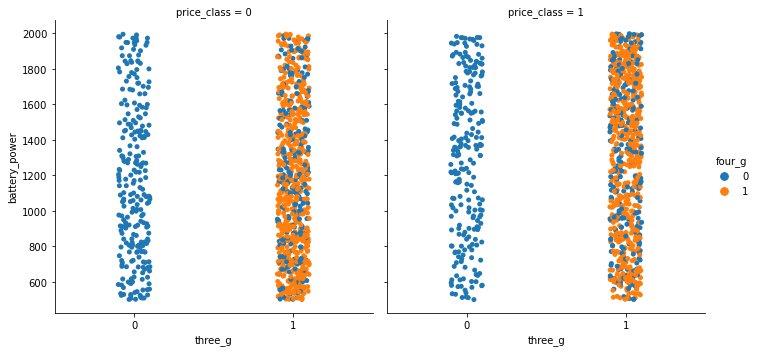

In [154]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='three_g', y='battery_power', hue='four_g', col='price_class', data=df)

- For both price class, most of the phone battery power ranging from 600 to 2000, have more both 4G and 3G compared to 4G only

<Figure size 2880x1440 with 0 Axes>

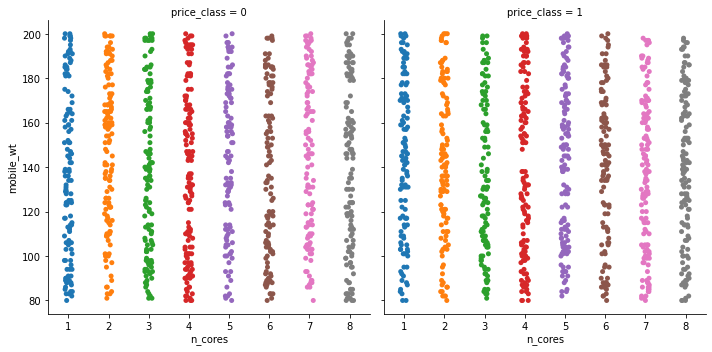

In [157]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(40, 20))
sns.catplot(x='n_cores', y='mobile_wt',col='price_class' ,data=df)

- From both price class, the number of cores and weight is almost have a same pattern

<Figure size 864x576 with 0 Axes>

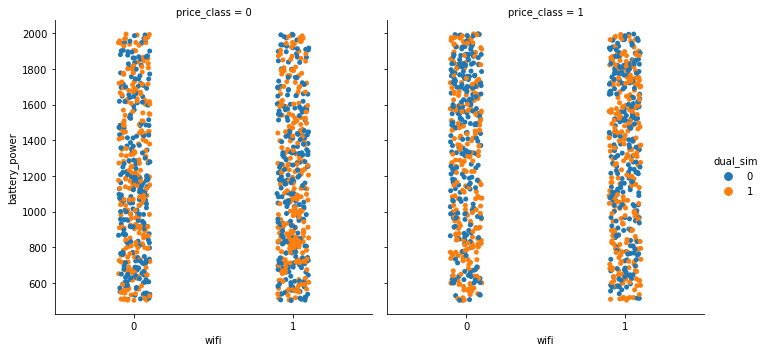

In [184]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='wifi', y='battery_power', hue='dual_sim', col='price_class', data=df)

- For both price class, most of the phone battery power ranging from 600 to 2000, the patterns cant not be identified
- Except for price class 0 with no wifi phone is less dense than the other 3 class

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

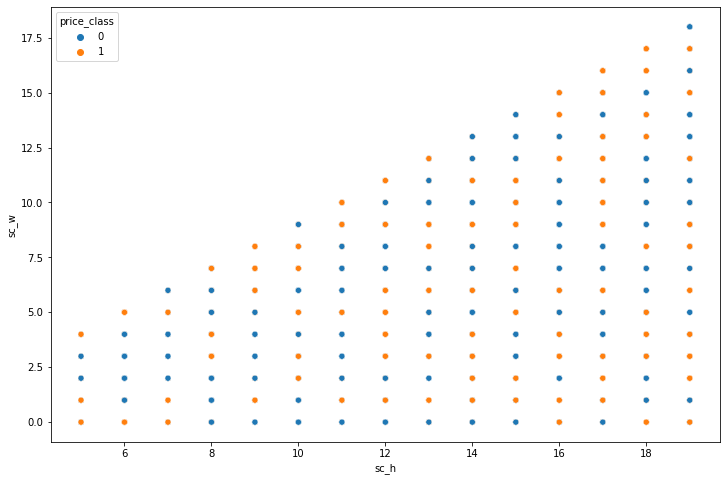

In [160]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sc_h', y='sc_w', hue='price_class', data=df)

- A phone with high or low height and weight can have a lowend or high end price
- This means that heigth and weight does not matter much

<AxesSubplot:xlabel='m_dep', ylabel='mobile_wt'>

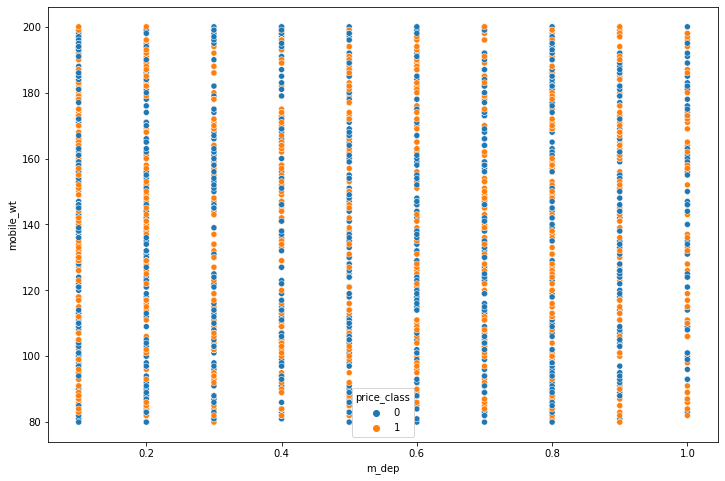

In [161]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.scatterplot(x='m_dep', y='mobile_wt', hue='price_class', data=df)

- For each depth of the phone, the weight and price can varies

<AxesSubplot:xlabel='n_cores', ylabel='ram'>

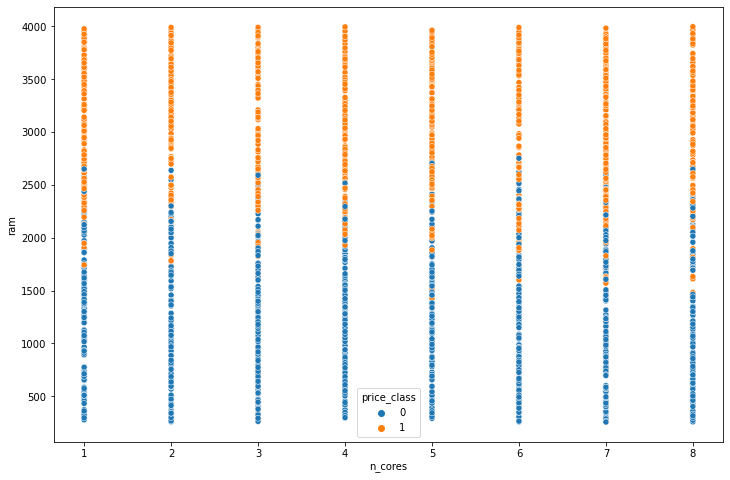

In [162]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.scatterplot(x='n_cores', y='ram', hue='price_class', data=df)

- The phone with ram above 2000 have a high price class compared to below 2k.
- This ram may cause the phone price higher/lower

<AxesSubplot:xlabel='int_memory', ylabel='ram'>

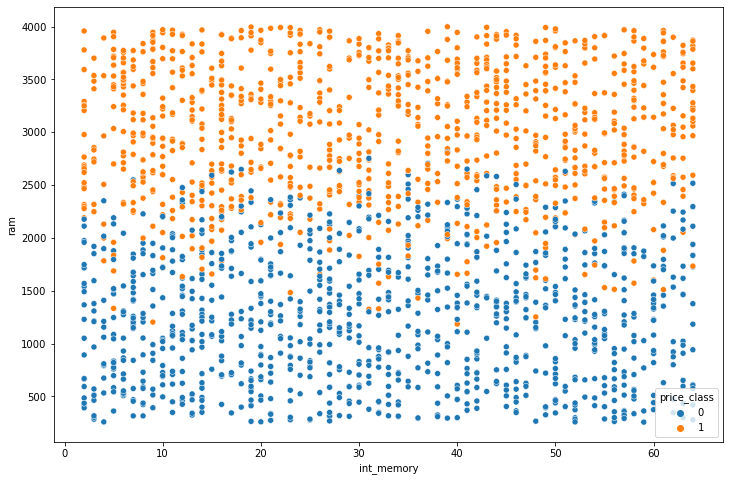

In [163]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.scatterplot(x='int_memory', y='ram', hue='price_class', data=df)

- Phone with any memory most likely does not have a effect on the price, because we do not see yellow hue from 0 - 60 memory.
- Ram however, that above 2k is again have a yellow hue

### Data Exploration Summary:

# 6. Data Preprocessing

In [167]:
#create variable to be dropped
cols=df.select_dtypes(['int64','float64']).columns
cols

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [168]:
# Remove outlier outside 1,5 IQR for train data (x)


print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in range(len(cols)):
    Q1 = df[cols[col]].quantile(0.25)
    Q3 = df[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[cols[col]] >= low_limit) & (df[cols[col]] <= high_limit)) & filtered_entries
    
dfo = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 2000
Jumlah baris setelah memfilter outlier: 1980


## Label Encoding Target variables

In [172]:
#make copy
dfc=dfo.copy()

In [175]:
dfc=pd.get_dummies(dfc)

In [177]:
dfc.head(10)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1,price_class_0,price_class_1
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1,0,1,0,1,0,0,1,1,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,0,1,0,1,0,1,1,0,0,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,0,1,0,1,0,1,1,0,0,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,1,0,0,1,1,0,1,0,0,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,0,1,0,1,0,1,1,0,1,0
5,1859,0.5,3,22,0.7,164,1,7,1004,1654,...,1,0,0,1,1,0,1,0,1,0
6,1821,1.7,4,10,0.8,139,8,10,381,1018,...,0,1,0,1,1,0,0,1,0,1
7,1954,0.5,0,24,0.8,187,4,0,512,1149,...,1,0,0,1,0,1,0,1,1,0
8,1445,0.5,0,53,0.7,174,7,14,386,836,...,1,0,0,1,1,0,1,0,1,0
9,509,0.6,2,9,0.1,93,5,15,1137,1224,...,0,1,0,1,1,0,1,0,1,0


- Highend price phone (1).
- Low end price phone (0).

In [178]:
#view correlation with target
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(dfc.corr()[['price_class']].sort_values(by='price_class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with price class', fontdict={'fontsize':18}, pad=16);

KeyError: "None of [Index(['price_class'], dtype='object')] are in the [columns]"

<Figure size 360x720 with 0 Axes>

- All features have decent correlation

## Split Data

In [ ]:
#define target and features
x=dfc.drop(columns=['death'])
y=dfc['death']

In [ ]:
#split data
xtrain,xtemp,ytrain,ytemp =train_test_split(x,y,train_size=0.75, random_state=37)
xvalid,xtest,yvalid,ytest=train_test_split(x,y,train_size=0.5,random_state=37)

## Create Pipeline for Features

In [ ]:
#define nums and categorical Data
nums=xtrain.select_dtypes(['int64','float64']).columns
cats=xtrain.select_dtypes(['object']).columns

In [ ]:
#define nums cats pipeline
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('encoding', OneHotEncoder())])

In [ ]:
#combine pipeline
full_pipe = ColumnTransformer([
        ("num", num_pipeline, nums),
        ("cat", cat_pipeline, cats)])

In [ ]:
#fit pipeline to train and test data features
xtrain=full_pipe.fit_transform(xtrain)
xtest=full_pipe.fit_transform(xtest)

In [ ]:
#view shape
print(xtrain.shape)
print(xtest.shape)

# 7. Define Model

In [ ]:
#Define Model
forest=RandomForestClassifier()
ada=AdaBoostClassifier()

- Random Forest and Adaboost is used because the target features(death) is Categorical.
- Recall will be used as main measurements, because we will focus on False Negatives, which means it is predicted that the patient predicted value is not dying, while the truth value is dying.
- ROC auc score will also be used to help recall

# 8. Train Model

In [ ]:
#fitting training data to model Random Forest
forest.fit(xtrain, ytrain)

In [ ]:
#fitting training data to model Ada Boost
ada.fit(xtrain, ytrain)

# 9. Evaluate Model

## Random Forest (Default Model)

In [ ]:
#predict train and test data
ypred_train_forest = forest.predict(xtrain)
ypred_test_forest=forest.predict(xtest)

In [ ]:
#model evaluation
print(classification_report(ytest, ypred_test_forest))
print(roc_auc_score(ytest, ypred_test_forest))
#plot confusion matrix
plot_confusion_matrix(forest, xtest, ytest)

- The Recall on (1) is Quite low, this means there are False Negatives in the predictions.
- The ROC AUC score is have a decent value and closer to 1, meaning that the model can classify good enough.

## Ada Boost

In [ ]:
#predict train and test data
ypred_train_ada =ada.predict(xtrain)
ypred_test_ada=ada.predict(xtest)

In [ ]:
#model evaluation
print(classification_report(ytest, ypred_test_ada))
print(roc_auc_score(ytest, ypred_test_ada))
#plot confusion matrix
plot_confusion_matrix(ada, xtest, ytest)

- The Recall on (1) is Quite low, this means there are False Negatives in the predictions, but its better than normal random forest.
- The ROC AUC score is have a decent value and closer to 1, meaning that the model can classify good enough.

# 10. Model Inference

In [ ]:
#imputation for test data
cols=xvalid.select_dtypes(['int64','float64']).columns

for i in cols:
    for x in xvalid[i]:
        if pd.isna(x)==True:
            means=xvalid[i].mean()
            xvalid[i].fillna(value=means,inplace=True)

In [ ]:
#fit pipeline to train and test data features
xvalid=full_pipe.fit_transform(xvalid)

## Random Forest

In [ ]:
#predict validity data
valid_predrf=forest.predict(xvalid)

In [ ]:
#compare with real target data
infrf=pd.DataFrame({'actual':yvalid, 'predict':valid_predrf})

In [ ]:
#view data
infrf.sample(5)

## Ada Boost

In [ ]:
#predict svm with validity
valid_predada=ada.predict(xvalid)

In [ ]:
#compare with real target data
infada=pd.DataFrame({'actual':yvalid, 'predict':valid_predada})

In [ ]:
#view data
infada.sample(5)

# 11. Summary

- Ada Boost Model is better than Random Forest
- But the increase of recall score from adaboost to random forest is very little
- The recall for all model is still low, around 0.66.
- It is Recommended to use Adaboost than Random Forest because it has overall better scores and classify better